In [1]:
%pip install --extra-index-url https://artefact.skao.int/repository/pypi-internal/simple git+https://gitlab.com/ska-telescope/ska-low-csp-test

Looking in indexes: https://pypi.org/simple, https://artefact.skao.int/repository/pypi-internal/simple
  Cloning https://gitlab.com/ska-telescope/ska-low-csp-test to /tmp/pip-req-build-bsknwjod
  Running command git clone --filter=blob:none --quiet https://gitlab.com/ska-telescope/ska-low-csp-test /tmp/pip-req-build-bsknwjod
  Resolved https://gitlab.com/ska-telescope/ska-low-csp-test to commit 0481cd9edca969eb94d8088cedb974a56b3bdeec
  Running command git submodule update --init --recursive -q
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import os
from io import BytesIO

from matplotlib import pyplot as plt
from PIL import Image

from ska_low_csp_test.cbf import visibilities
from ska_low_csp_test.domain import plotting

In [3]:
PATH_TO_PCAP_DISK = "/mnt/cnic-data"

In [4]:
vis_pcap_files = [
    "/test-data/20241115_080631_vis-via-tmc.pcap",
    "/test-data/20241115_080933_vis-via-tmc.pcap",
    "/test-data/20241115_081348_vis-via-tmc.pcap"]

In [5]:
def basic_display(pcap_output, scan_ids):
    # Plot output
    baseline_idx = 1  # cross-correlation baseline  # pylint: disable=invalid-name
    for scan_id in scan_ids:
        # XY channel averaged phase vs time
        plot = plotting.plot_channel_averaged_phase_vs_time(
            pcap_output,
            baseline_idx,
            visibilities.Polarization.XY,
        )
        img = Image.open(BytesIO(plot))
        plt.imshow(img, aspect="auto")
        plt.axis("off")
        plt.show()

        # XY time averaged phase vs channel
        plot = plotting.plot_time_averaged_phase_vs_channel(
            pcap_output,
            [baseline_idx],
            visibilities.Polarization.XY,
            scan_id,
            trim_first_s=5,
        )
        img = Image.open(BytesIO(plot))
        plt.imshow(img, aspect="auto")
        plt.axis("off")
        plt.show()


Inspecting EB /mnt/cnic-data/20241115_080631_vis-via-tmc.pcap
      ScaID  Chann  Epoch  ZoomI  VisFl  Resol SrcID  BeaID  Subar     FreHz  \
0      1234      0      0      0      0     32  b'L'      1      1  77736975   
1      1234      1      0      0      0     32  b'L'      1      1  77742400   
2      1234      2      0      0      0     32  b'L'      1      1  77747825   
3      1234      3      0      0      0     32  b'L'      1      1  77753251   
4      1234      4      0      0      0     32  b'L'      1      1  77758676   
...     ...    ...    ...    ...    ...    ...   ...    ...    ...       ...   
1146   1234   1147      0      0      0     32  b'L'      1      1  83959848   
1147   1234   1148      0      0      0     32  b'L'      1      1  83965273   
1148   1234   1149      0      0      0     32  b'L'      1      1  83970699   
1149   1234   1150      0      0      0     32  b'L'      1      1  83976124   
1150   1234   1151      0      0      0     32  b'L'     

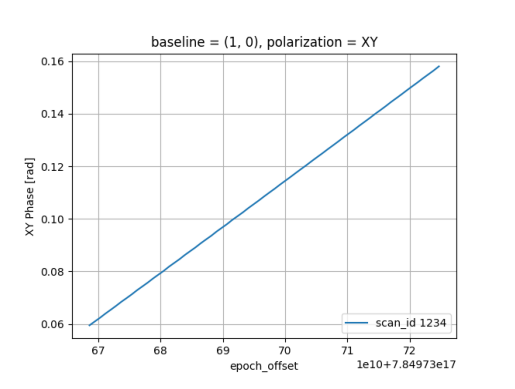


File /mnt/cnic-data/20241115_080933_vis-via-tmc.pcap contains no data

File /mnt/cnic-data/20241115_081348_vis-via-tmc.pcap contains no data


In [6]:
for idx, pcap_file_path in enumerate(vis_pcap_files):
    filename = pcap_file_path.replace("/test-data", PATH_TO_PCAP_DISK)
    if os.path.getsize(filename) < 100:  # bytes
        print(f"\nFile {filename} contains no data")
    else:
        print(f"\nInspecting EB {filename}")
        pcap_output = visibilities.unpack_pcap_file(filename)
        print(pcap_output.metadata)  # pylint: disable=pointless-statement
        scan_ids = np.unique(pcap_output.metadata['ScaID'])
        print(pcap_output.data)  # pylint: disable=pointless-statement
        basic_display(pcap_output, scan_ids)